In [3]:
def black_box_function(x, y):
    """Function with unknown internals we wish to maximize.

    This is just serving as an example, for all intents and
    purposes think of the internals of this function, i.e.: the process
    which generates its output values, as unknown.
    """
    return -x ** 2 - (y - 1) ** 2 + 1

from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'x': (2, 4), 'y': (-3, 3)}

optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    random_state=1,
)

optimizer.maximize(
    init_points=2,
    n_iter=3,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        | -7.135    |  2.834    |  1.322    |
|  2        | -7.78     |  2.0      | -1.186    |
|  3        | -7.11     |  2.218    | -0.7867   |
|  4        | -12.4     |  3.66     |  0.9608   |
|  5        | -6.999    |  2.23     | -0.7392   |


In [4]:
print(optimizer.max)

{'target': -6.999472814518675, 'params': {'x': 2.2303920156083024, 'y': -0.7392021938893159}}


In [5]:
optimizer.set_bounds(new_bounds={"x": (-2, 3)})

optimizer.maximize(
    init_points=0,
    n_iter=5,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  6        | -2.942    |  1.98     |  0.8567   |
|  7        | -0.4597   |  1.096    |  1.508    |
|  8        |  0.5304   | -0.6807   |  1.079    |
|  9        | -5.33     | -1.526    |  3.0      |
|  10       | -5.419    | -2.0      | -0.5552   |


In [6]:
optimizer.probe(
    params={"x": 0.5, "y": 0.7},
    lazy=True,
)

optimizer.probe(
    params=[-0.3, 0.1],
    lazy=True,
)

# Will probe only the two points specified above
optimizer.maximize(init_points=0, n_iter=0)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  11       |  0.66     |  0.5      |  0.7      |
|  12       |  0.1      | -0.3      |  0.1      |


Advanced tour of the Bayesian Optimization package

In [9]:
# Let's start by definying our function, bounds, and instanciating an optimization object.
def black_box_function(x, y):
    return -x ** 2 - (y - 1) ** 2 + 1

optimizer = BayesianOptimization(
    f=None,
    pbounds={'x': (-2, 2), 'y': (-3, 3)},
    verbose=2,
    random_state=1,
)

from bayes_opt import UtilityFunction

utility = UtilityFunction(kind="ucb", kappa=2.5, xi=0.0)

next_point_to_probe = optimizer.suggest(utility)
print("Next point to probe is:", next_point_to_probe)


Next point to probe is: {'x': -0.331911981189704, 'y': 1.3219469606529488}


In [10]:
target = black_box_function(**next_point_to_probe)
print("Found the target value to be:", target)

Found the target value to be: 0.7861845912690542


In [11]:
optimizer.register(
    params=next_point_to_probe,
    target=target,
)

for _ in range(5):
    next_point = optimizer.suggest(utility)
    target = black_box_function(**next_point)
    optimizer.register(params=next_point, target=target)
    
    print(target, next_point)
print(optimizer.max)

-18.49187152919165 {'x': 1.8861546000771092, 'y': -2.9917780942581977}
0.7911494590443674 {'x': -0.31764604716962586, 'y': 1.3285597809731806}
-7.0 {'x': -2.0, 'y': 3.0}
-7.0 {'x': 2.0, 'y': 3.0}
-7.503866469950651 {'x': -2.0, 'y': -1.122231483592365}
{'target': 0.7911494590443674, 'params': {'x': -0.31764604716962586, 'y': 1.3285597809731806}}


In [16]:
def func_with_discrete_params(x, y, d):
    # Simulate necessity of having d being discrete.
    assert type(d) == int
    
    return ((x + y + d) // (1 + d)) / (1 + (x + y) ** 2)

def function_to_be_optimized(x, y, w):
    d = int(w)
    return func_with_discrete_params(x, y, d)

In [17]:
optimizer = BayesianOptimization(
    f=function_to_be_optimized,
    pbounds={'x': (-10, 10), 'y': (-10, 10), 'w': (0, 5)},
    verbose=2,
    random_state=1,
)
optimizer.maximize(alpha=1e-3)

|   iter    |  target   |     w     |     x     |     y     |
-------------------------------------------------------------
|  1        | -0.06199  |  2.085    |  4.406    | -9.998    |
|  2        | -0.0344   |  1.512    | -7.065    | -8.153    |
|  3        | -0.2177   |  0.9313   | -3.089    | -2.065    |
|  4        |  0.1865   |  2.694    | -1.616    |  3.704    |
|  5        | -0.2187   |  1.022    |  7.562    | -9.452    |
|  6        |  0.1868   |  2.533    | -1.728    |  3.815    |
|  7        |  0.05119  |  3.957    | -0.6151   |  6.785    |
|  8        |  0.1761   |  0.5799   |  1.181    |  4.054    |
|  9        |  0.04045  |  4.004    |  4.304    |  2.656    |
|  10       |  0.07509  |  0.0      |  4.843    |  7.759    |
|  11       |  0.3512   |  0.0      | -5.713    |  7.072    |
|  12       | -0.8068   |  0.0      | -9.09     |  8.6      |
|  13       |  0.3774   |  0.3974   | -4.19     |  6.263    |
|  14       |  0.157    |  0.0      | -3.587    |  8.534    |
|  15   

In [18]:
optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds={'x': (-2, 2), 'y': (-3, 3)},
    verbose=2,
    random_state=1,
)
optimizer.maximize(
    init_points=1,
    n_iter=5,
    # What follows are GP regressor parameters
    alpha=1e-3,
    n_restarts_optimizer=5
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  0.7862   | -0.3319   |  1.322    |
|  2        | -18.49    |  1.886    | -2.992    |
|  3        |  0.7911   | -0.3176   |  1.329    |
|  4        | -6.11     | -1.763    |  3.0      |
|  5        | -2.895    |  1.533    |  2.243    |
|  6        | -4.806    | -2.0      | -0.3439   |


In [21]:
optimizer.set_gp_params(normalize_y=True)
from bayes_opt.event import DEFAULT_EVENTS, Events

optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds={'x': (-2, 2), 'y': (-3, 3)},
    verbose=2,
    random_state=1,
)

class BasicObserver:
    def update(self, event, instance):
        """Does whatever you want with the event and `BayesianOptimization` instance."""
        print("Event `{}` was observed".format(event))

my_observer = BasicObserver()

optimizer.subscribe(
    event=Events.OPTIMIZATION_STEP,
    subscriber=my_observer,
    callback=None, # Will use the `update` method as callback
)

In [23]:
def my_callback(event, instance):
    print("Go nuts here!")

optimizer.subscribe(
    event=Events.OPTIMIZATION_START,
    subscriber="Any hashable object",
    callback=my_callback,
)

optimizer.maximize(init_points=1, n_iter=2)

Go nuts here!
Event `optimization:step` was observed
Event `optimization:step` was observed
Event `optimization:step` was observed


In [24]:
DEFAULT_EVENTS

['optimization:start', 'optimization:step', 'optimization:end']

Visualization

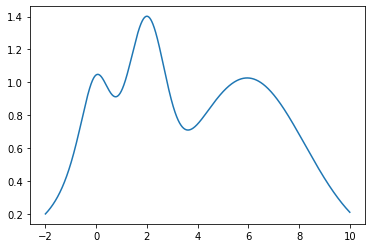

In [28]:
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

def target(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1)

x = np.linspace(-2, 10, 10000).reshape(-1, 1)
y = target(x)

plt.plot(x, y);

In [29]:
optimizer = BayesianOptimization(target, {'x': (-2, 10)}, random_state=27)
optimizer.maximize(init_points=2, n_iter=0, kappa=5)

|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |


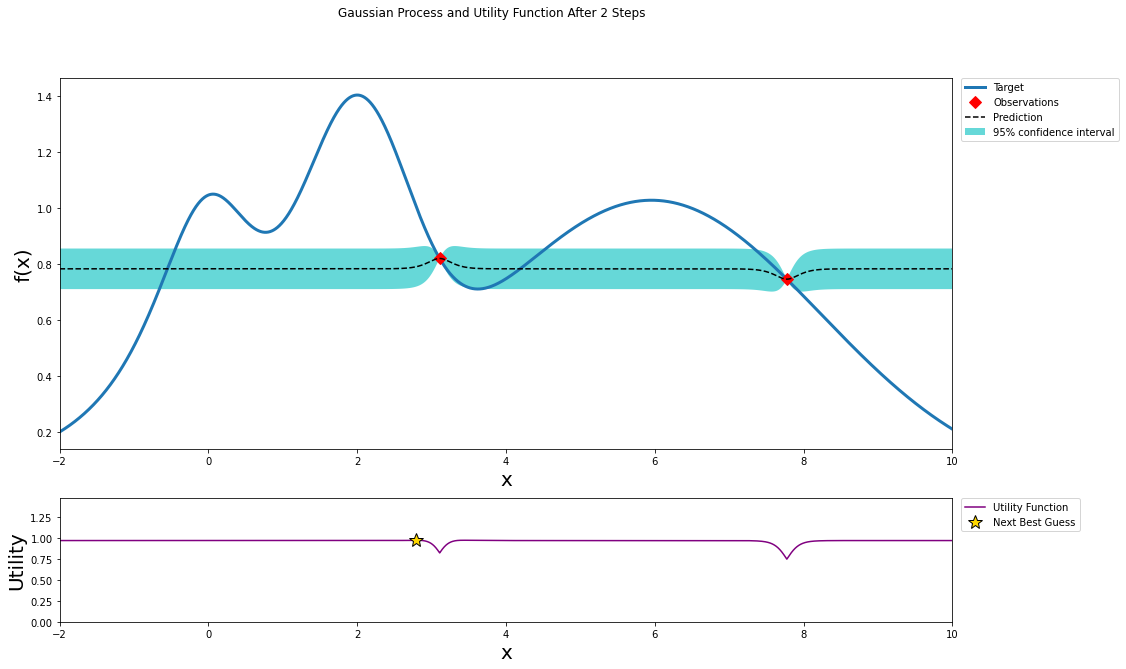

In [31]:
def posterior(optimizer, x_obs, y_obs, grid):
    optimizer._gp.fit(x_obs, y_obs)

    mu, sigma = optimizer._gp.predict(grid, return_std=True)
    return mu, sigma

def plot_gp(optimizer, x, y):
    fig = plt.figure(figsize=(16, 10))
    steps = len(optimizer.space)
    fig.suptitle(
        'Gaussian Process and Utility Function After {} Steps'.format(steps),
        fontdict={'size':30}
    )
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    x_obs = np.array([[res["params"]["x"]] for res in optimizer.res])
    y_obs = np.array([res["target"] for res in optimizer.res])
    
    mu, sigma = posterior(optimizer, x_obs, y_obs, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(x_obs.flatten(), y_obs, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility_function = UtilityFunction(kind="ucb", kappa=5, xi=0)
    utility = utility_function.utility(x, optimizer._gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  3        |  0.5234   | -0.9694   |


C:\Users\James\AppData\Roaming\Python\Python38\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


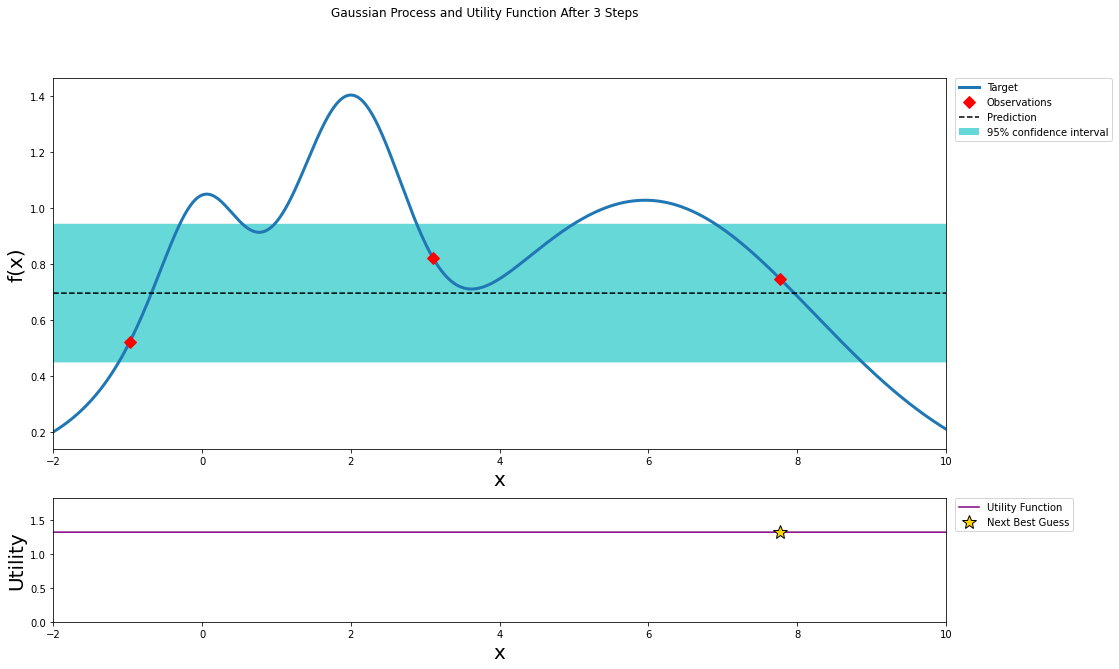

In [32]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  4        |  0.8164   |  3.116    |


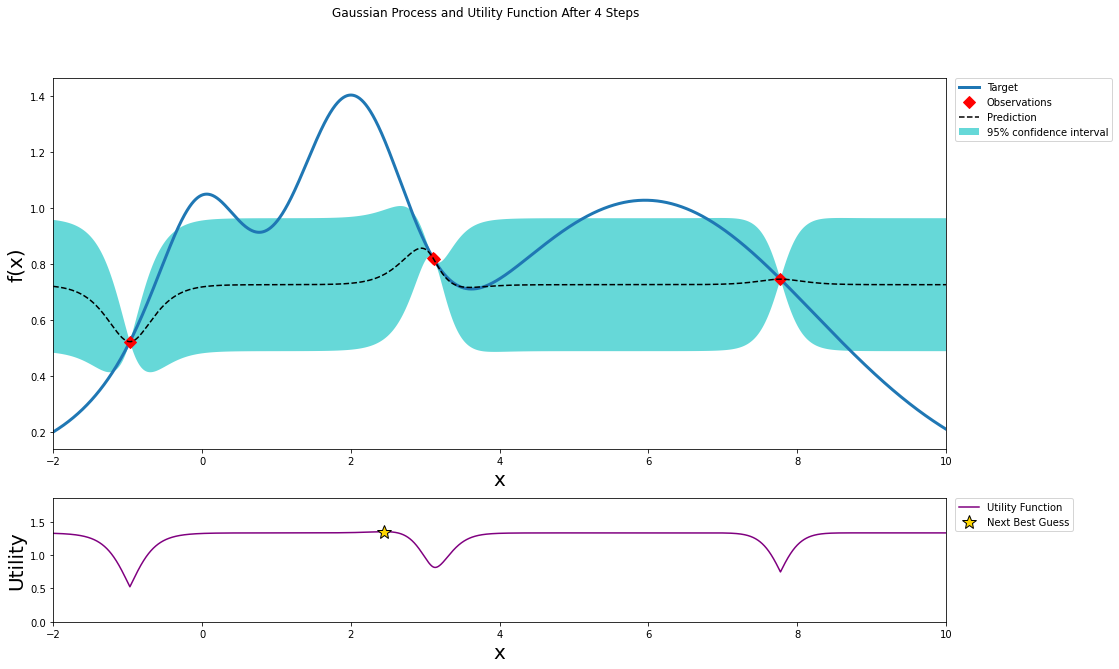

In [33]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  5        |  1.243    |  2.449    |


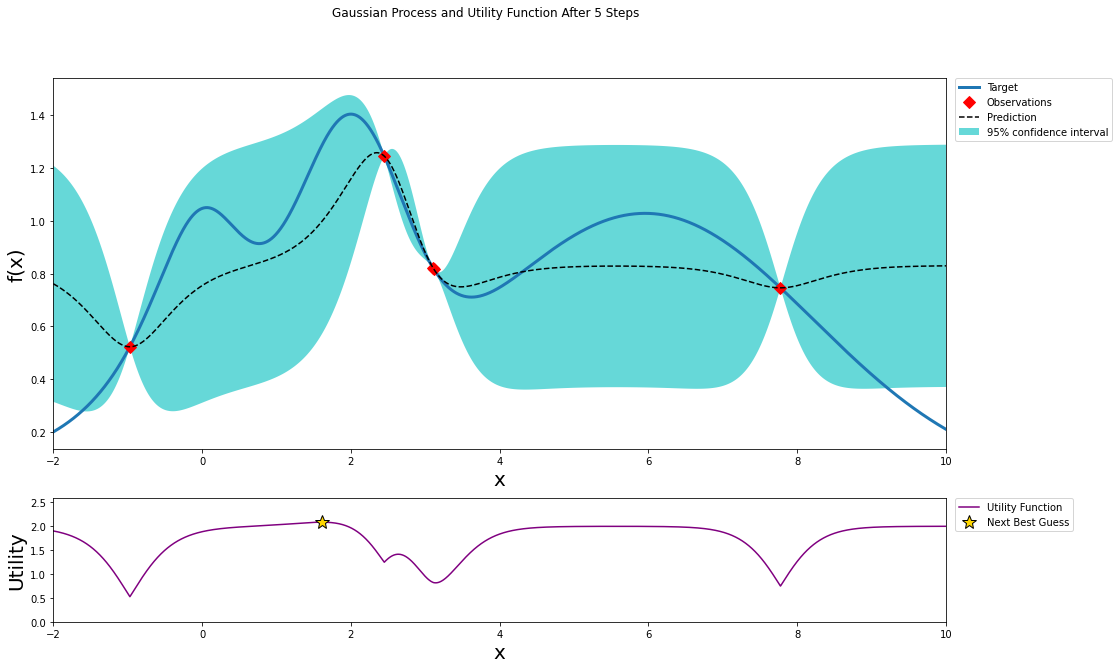

In [34]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  12       |  0.2017   | -2.0      |
|  13       |  1.402    |  2.011    |
|  14       |  0.477    |  8.77     |
|  15       |  1.387    |  2.13     |
|  16       |  1.396    |  1.919    |
|  17       |  1.402    |  1.999    |
|  18       |  1.402    |  2.0      |
|  19       |  1.402    |  2.001    |
|  20       |  1.402    |  2.001    |
|  21       |  1.402    |  2.001    |


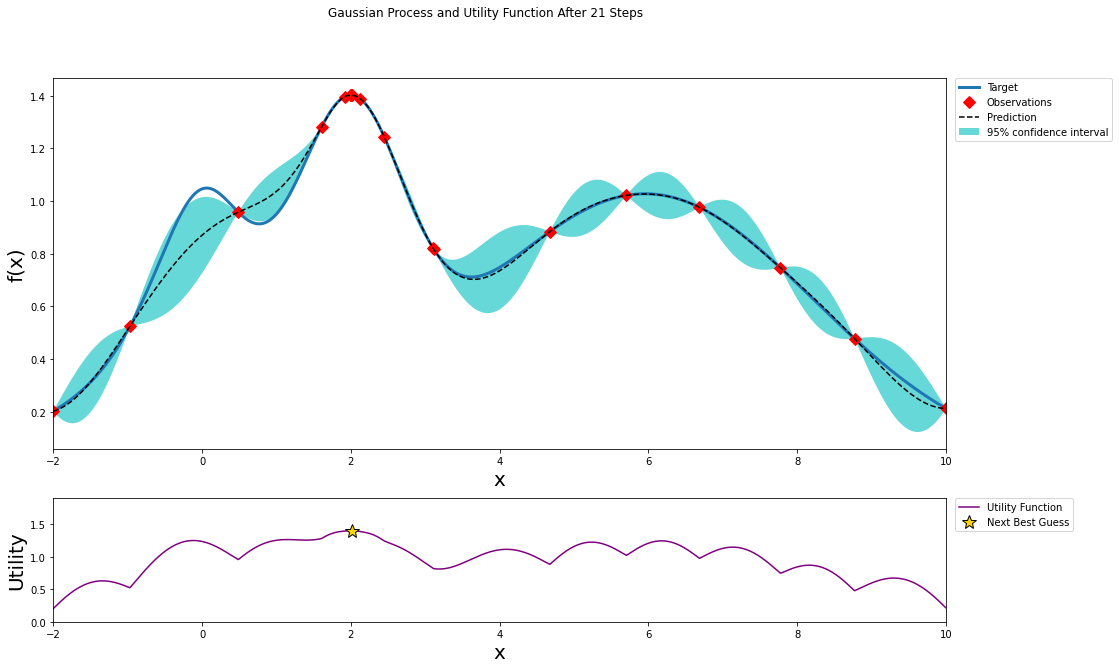

In [37]:
optimizer.maximize(init_points=0, n_iter=10, kappa=5)
plot_gp(optimizer, x, y)

Sequential Domain Reduction

In [39]:
import numpy as np
from bayes_opt import BayesianOptimization
from bayes_opt import SequentialDomainReductionTransformer
import matplotlib.pyplot as plt

def ackley(**kwargs):
    x = np.fromiter(kwargs.values(), dtype=float)
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -1.0 * (-20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e)

pbounds = {'x': (-5, 5), 'y': (-5, 5)}
bounds_transformer = SequentialDomainReductionTransformer()

In [40]:
mutating_optimizer = BayesianOptimization(
    f=ackley,
    pbounds=pbounds,
    verbose=0,
    random_state=1,
    bounds_transformer=bounds_transformer
)

mutating_optimizer.maximize(
    init_points=2,
    n_iter=50,
)

In [41]:
standard_optimizer = BayesianOptimization(
    f=ackley,
    pbounds=pbounds,
    verbose=0,
    random_state=1,
)

standard_optimizer.maximize(
    init_points=2,
    n_iter=50,
)

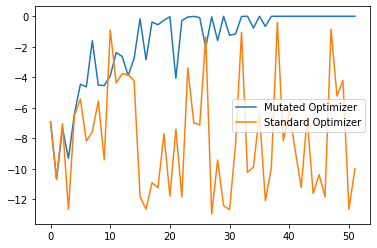

In [42]:
plt.plot(mutating_optimizer.space.target, label='Mutated Optimizer')
plt.plot(standard_optimizer.space.target, label='Standard Optimizer')
plt.legend()

In [43]:
# example x-bound shrinking
x_min_bound = [b[0][0] for b in bounds_transformer.bounds]
x_max_bound = [b[0][1] for b in bounds_transformer.bounds]
x = [x[0] for x in mutating_optimizer.space.params]

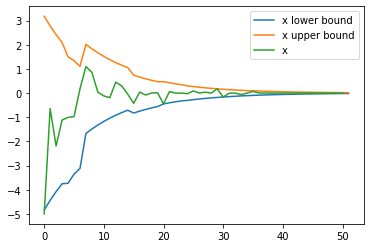

In [44]:
plt.plot(x_min_bound[1:], label='x lower bound')
plt.plot(x_max_bound[1:], label='x upper bound')
plt.plot(x[1:], label='x')
plt.legend()

Model Fitting

In [49]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC

from bayes_opt import BayesianOptimization
from bayes_opt.util import Colours

data, targets = make_classification(
        n_samples=1000,
        n_features=45,
        n_informative=12,
        n_redundant=7,
        random_state=134985745,
    )

def svc_cv(C, gamma, data, targets):
    """SVC cross validation.
    This function will instantiate a SVC classifier with parameters C and
    gamma. Combined with data and targets this will in turn be used to perform
    cross validation. The result of cross validation is returned.
    Our goal is to find combinations of C and gamma that maximizes the roc_auc
    metric.
    """
    estimator = SVC(C=C, gamma=gamma, random_state=2)
    cval = cross_val_score(estimator, data, targets, scoring='roc_auc', cv=4)
    return cval.mean()

In [52]:
def optimize_svc(data, targets):
    """Apply Bayesian Optimization to SVC parameters."""
    def svc_crossval(expC, expGamma):
        """Wrapper of SVC cross validation.
        Notice how we transform between regular and log scale. While this
        is not technically necessary, it greatly improves the performance
        of the optimizer.
        """
        C = 10 ** expC
        gamma = 10 ** expGamma
        return svc_cv(C=C, gamma=gamma, data=data, targets=targets)

    optimizer = BayesianOptimization(
        f=svc_crossval,
        pbounds={"expC": (-3, 2), "expGamma": (-4, -1)},
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)
    
print(Colours.yellow("--- Optimizing SVM ---"))
optimize_svc(data, targets)

--- Optimizing SVM ---
|   iter    |  target   |   expC    | expGamma  |
-------------------------------------------------
|  1        |  0.882    | -2.042    | -2.134    |
|  2        |  0.9142   | -0.8114   | -1.644    |
|  3        |  0.9402   |  0.8999   | -3.182    |
|  4        |  0.9174   | -1.618    | -1.594    |
|  5        |  0.9345   |  1.791    | -1.372    |
|  6        |  0.9642   |  0.9865   | -2.948    |
|  7        |  0.9018   | -1.075    | -2.384    |
|  8        |  0.9725   |  1.201    | -2.671    |
|  9        |  0.9738   |  0.6978   | -2.333    |
|  10       |  0.9387   |  0.6369   | -1.421    |
|  11       |  0.9698   |  2.0      | -3.014    |
|  12       |  0.9105   |  1.999    | -3.923    |
|  13       |  0.9727   |  2.0      | -2.383    |
|  14       |  0.8234   | -3.0      | -4.0      |
|  15       |  0.9091   | -3.0      | -1.0      |
Final result: {'target': 0.9738395555555556, 'params': {'expC': 0.6977882861939939, 'expGamma': -2.3333826335460803}}


Exploitation vs Exploration

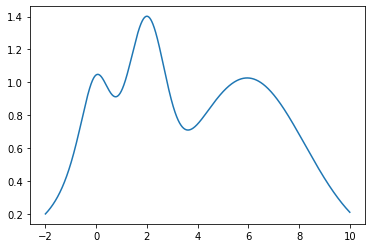

In [54]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization

np.random.seed(42)
xs = np.linspace(-2, 10, 10000)

def f(x):
    return np.exp(-(x - 2) ** 2) + np.exp(-(x - 6) ** 2 / 10) + 1/ (x ** 2 + 1)

plt.plot(xs, f(xs))
plt.show()

In [56]:
def plot_bo(f, bo):
    x = np.linspace(-2, 10, 10000)
    mean, sigma = bo._gp.predict(x.reshape(-1, 1), return_std=True)
    
    plt.figure(figsize=(16, 9))
    plt.plot(x, f(x))
    plt.plot(x, mean)
    plt.fill_between(x, mean + sigma, mean - sigma, alpha=0.1)
    plt.scatter(bo.space.params.flatten(), bo.space.target, c="red", s=50, zorder=10)
    plt.show()

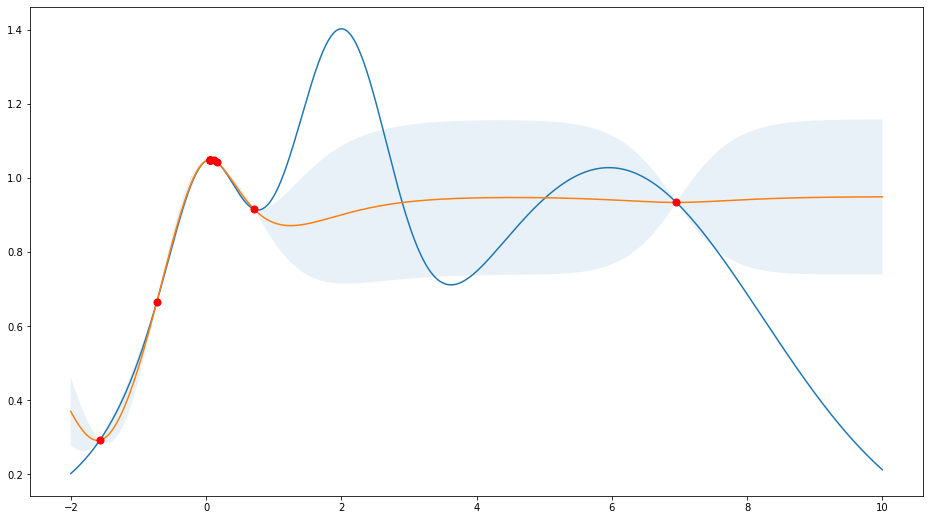

In [57]:
bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=987234,
)
bo.maximize(n_iter=10, acq="ucb", kappa=0.1)
plot_bo(f, bo)

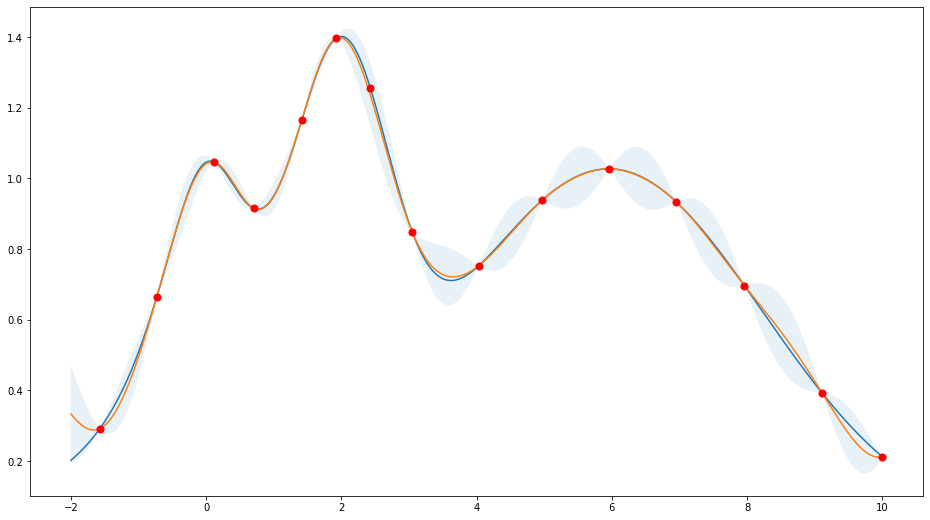

In [58]:
bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=987234,
)
bo.maximize(n_iter=10, acq="ucb", kappa=10)
plot_bo(f, bo)

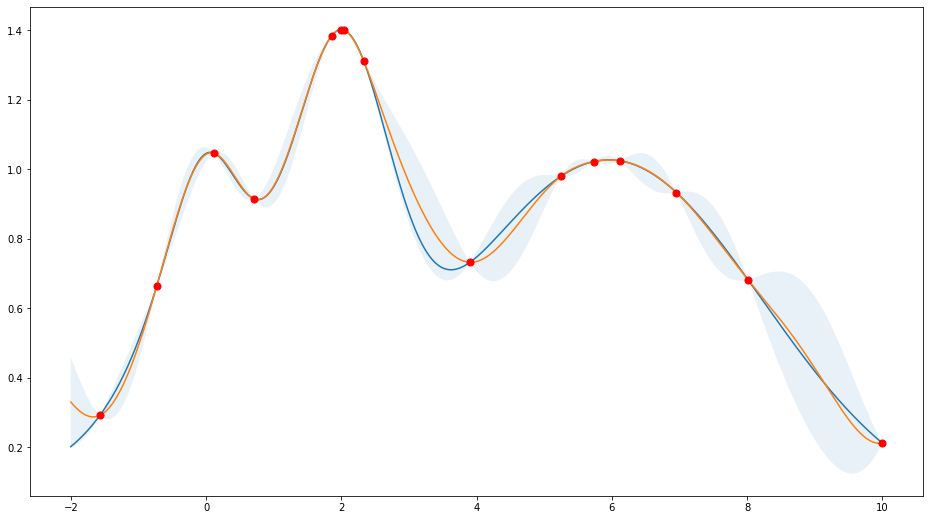

In [59]:
bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=987234,
)
bo.maximize(n_iter=10, acq="ei", xi=1e-4)
plot_bo(f, bo)

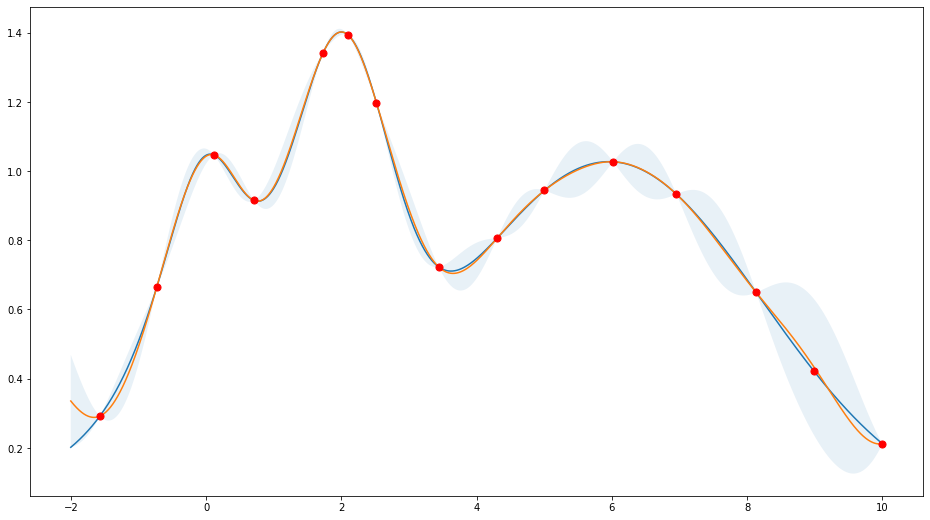

In [60]:
bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=987234,
)
bo.maximize(n_iter=10, acq="ei", xi=1e-1)
plot_bo(f, bo)

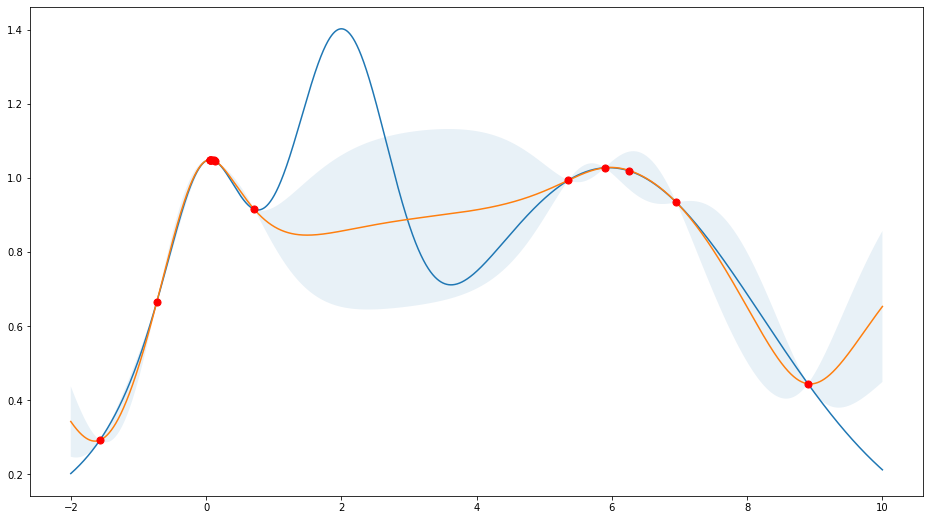

In [61]:
bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=987234,
)
bo.maximize(n_iter=10, acq="poi", xi=1e-4)
plot_bo(f, bo)

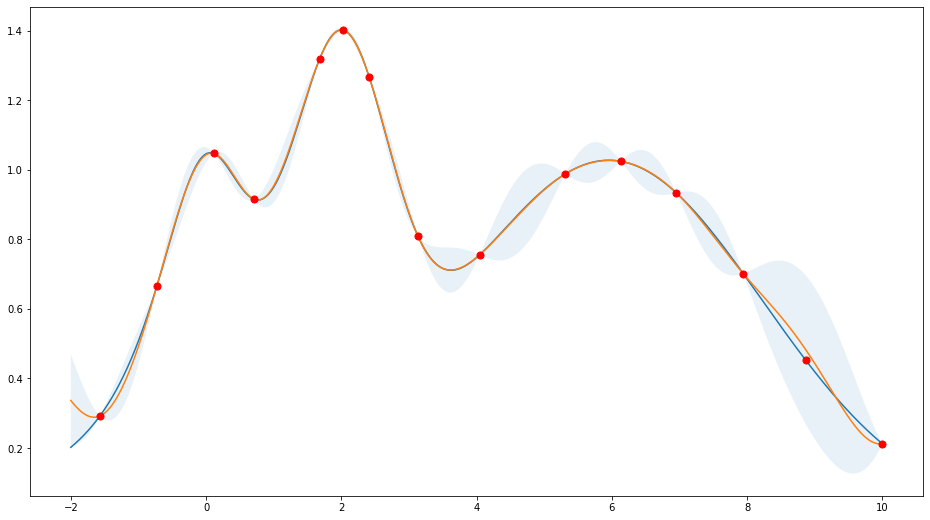

In [62]:
bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=987234,
)
bo.maximize(n_iter=10, acq="poi", xi=1e-1)
plot_bo(f, bo)

Async Optimization

In [64]:
import time
import random
from bayes_opt import BayesianOptimization
from bayes_opt.util import UtilityFunction, Colours
import asyncio
import threading
import json
import tornado.ioloop
import tornado.httpserver
from tornado.web import RequestHandler
import requests

In [65]:

def black_box_function(x, y):
    """Function with unknown internals we wish to maximize.
    This is just serving as an example, however, for all intents and
    purposes think of the internals of this function, i.e.: the process
    which generates its outputs values, as unknown.
    """
    time.sleep(random.randint(1, 7))
    return -x ** 2 - (y - 1) ** 2 + 1


class BayesianOptimizationHandler(RequestHandler):
    """Basic functionality for NLP handlers."""
    _bo = BayesianOptimization(
        f=black_box_function,
        pbounds={"x": (-4, 4), "y": (-3, 3)}
    )
    _uf = UtilityFunction(kind="ucb", kappa=3, xi=1)

    def post(self):
        """Deal with incoming requests."""
        body = tornado.escape.json_decode(self.request.body)

        try:
            self._bo.register(
                params=body["params"],
                target=body["target"],
            )
            print("BO has registered: {} points.".format(len(self._bo.space)), end="\n\n")
        except KeyError:
            pass
        finally:
            suggested_params = self._bo.suggest(self._uf)

        self.write(json.dumps(suggested_params))


def run_optimization_app():
    asyncio.set_event_loop(asyncio.new_event_loop())
    handlers = [
        (r"/bayesian_optimization", BayesianOptimizationHandler),
    ]
    server = tornado.httpserver.HTTPServer(
        tornado.web.Application(handlers)
    )
    server.listen(9009)
    tornado.ioloop.IOLoop.instance().start()


def run_optimizer():
    global optimizers_config
    config = optimizers_config.pop()
    name = config["name"]
    colour = config["colour"]

    register_data = {}
    max_target = None
    for _ in range(10):
        status = name + " wants to register: {}.\n".format(register_data)

        resp = requests.post(
            url="http://localhost:9009/bayesian_optimization",
            json=register_data,
        ).json()
        target = black_box_function(**resp)

        register_data = {
            "params": resp,
            "target": target,
        }

        if max_target is None or target > max_target:
            max_target = target

        status += name + " got {} as target.\n".format(target)
        status += name + " will to register next: {}.\n".format(register_data)
        print(colour(status), end="\n")

    global results
    results.append((name, max_target))
    print(colour(name + " is done!"), end="\n\n")

In [67]:
ioloop = tornado.ioloop.IOLoop.instance()
optimizers_config = [
    {"name": "optimizer 1", "colour": Colours.red},
    {"name": "optimizer 2", "colour": Colours.green},
    {"name": "optimizer 3", "colour": Colours.blue},
]
    
app_thread = threading.Thread(target=run_optimization_app)
app_thread.daemon = True
app_thread.start()

targets = (
    run_optimizer,
    run_optimizer,
    run_optimizer
)

optimizer_threads = []
for target in targets:
    optimizer_threads.append(threading.Thread(target=target))
    optimizer_threads[-1].daemon = True
    optimizer_threads[-1].start()
results = []
for optimizer_thread in optimizer_threads:
    optimizer_thread.join()

for result in results:
    print(result[0], "found a maximum value of: {}".format(result[1]))

ioloop.stop()

optimizer 1 wants to register: {}.
optimizer 1 got -7.751507809391269 as target.
optimizer 1 will to register next: {'params': {'x': 0.8455635773989307, 'y': -1.8348774305016422}, 'target': -7.751507809391269}.

BO has registered: 1 points.

optimizer 3 wants to register: {}.
optimizer 3 got -12.167109845498663 as target.
optimizer 3 will to register next: {'params': {'x': -3.5425697624035486, 'y': 0.2143096513239282}, 'target': -12.167109845498663}.

optimizer 2 wants to register: {}.
optimizer 2 got -3.4747753142721054 as target.
optimizer 2 will to register next: {'params': {'x': 1.8657890156726875, 'y': 1.9967982058908662}, 'target': -3.4747753142721054}.

BO has registered: 2 points.

BO has registered: 3 points.

optimizer 1 wants to register: {'params': {'x': 0.8455635773989307, 'y': -1.8348774305016422}, 'target': -7.751507809391269}.
optimizer 1 got -18.102568975439524 as target.
optimizer 1 will to register next: {'params': {'x': -3.897682930268867, 'y': 2.977532996066114}, '

optimizer 2 wants to register: {'params': {'x': -0.06305391743124543, 'y': 0.8136747855952755}, 'target': 0.9613071179736071}.
optimizer 2 got 0.9184008314206428 as target.
optimizer 2 will to register next: {'params': {'x': 0.27423363779291915, 'y': 0.920030752897009}, 'target': 0.9184008314206428}.

BO has registered: 25 points.

optimizer 3 wants to register: {'params': {'x': -0.06431252384199519, 'y': 0.818395933857292}, 'target': 0.9628838624375078}.
optimizer 3 got 0.9168331285720611 as target.
optimizer 3 will to register next: {'params': {'x': 0.27681267942277665, 'y': 0.919119767936028}, 'target': 0.9168331285720611}.

optimizer 3 is done!

optimizer 2 wants to register: {'params': {'x': 0.27423363779291915, 'y': 0.920030752897009}, 'target': 0.9184008314206428}.
optimizer 2 got 0.9503854093522082 as target.
optimizer 2 will to register next: {'params': {'x': -0.20389802223681927, 'y': 1.0896670908176764}, 'target': 0.9503854093522082}.

BO has registered: 26 points.

optimize